In [1]:
import sys
sys.path.append('../')

import numpy as np

In [2]:
from src.mechanism.single_item import SingleItemAuction
from src.game import Game
from src.strategy import Strategy
from src.learner import SODA

In [3]:
# parameter mechanism
bidder = ['1', '1']
o_space = {'1':[0,1]}
a_space = {'1':[0,1]}
prior = 'uniform'
payment_rule = 'first_price'
risk = 1.0

# parameter approximation game
n = 64
m = 64

# parameter learner
max_iter = int(1e4)
tol = 1e-5
steprule_bool = True
eta = 10
beta = 1/20

In [4]:
# create mechanism
mechanism = SingleItemAuction(bidder, o_space, a_space, prior, payment_rule, risk)

# create approximation game
game = Game(mechanism, n, m)
game.get_prior({'distribution':'uniform'})
game.get_utility(mechanism)

# create learner
soda = SODA(max_iter, tol, steprule_bool, eta, beta)

#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('random')

In [5]:
# run soda
soda.run(game, strategies)

 46%|█████████▏          | 4.57k/10.0k [00:02<00:02, 2.22kit/s]                                                                                           

Convergence after 4573 iterations
Relative utility loss 0.001 %


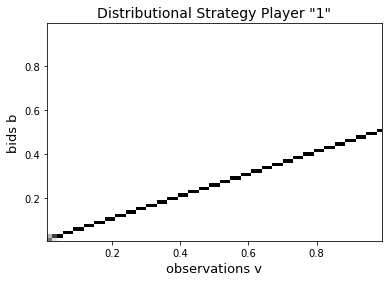

In [6]:
strategies['1'].plot()